In [47]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [48]:
import pathlib

# Replace 'local_path' with the local directory where you have downloaded and extracted the dataset.
local_path = "dataset"
data_dir = pathlib.Path(local_path)

In [49]:
print(data_dir)

dataset


In [50]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 960 files belonging to 2 classes.
Using 768 files for training.


In [51]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 960 files belonging to 2 classes.
Using 192 files for validation.


In [52]:
class_names = train_ds.class_names
print(class_names)

['no', 'yes']


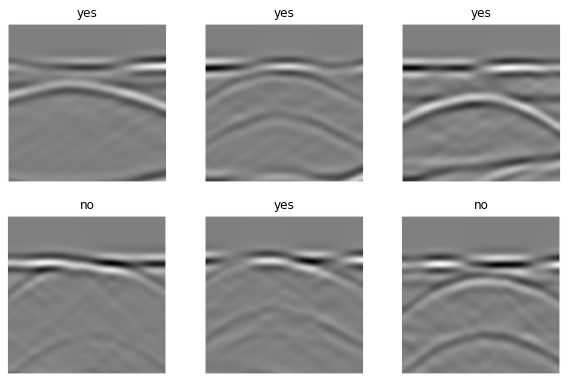

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [54]:
resnet_model = Sequential()

import ssl
ssl._create_default_https_context = ssl._create_unverified_context


pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [55]:
resnet_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_9 (ModuleWr  (None, 2048)              0         
 apper)                                                          
                                                                 
 module_wrapper_10 (ModuleW  (None, 512)               1049088   
 rapper)                                                         
                                                                 
 module_wrapper_11 (ModuleW  (None, 5)                 2565      
 rapper)                                                         
                                                                 
Total params: 24639365 (93.99 MB)
Trainable params: 1051653 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
________

In [56]:
resnet_model.compile(loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [57]:

epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
)


Epoch 1/10


24/24 [==============================] - 52s 2s/step - loss: 1.0474 - accuracy: 0.6458 - val_loss: 0.3741 - val_accuracy: 0.7969
Epoch 2/10
24/24 [==============================] - 55s 2s/step - loss: 0.4641 - accuracy: 0.7852 - val_loss: 1.1159 - val_accuracy: 0.6302
Epoch 3/10
24/24 [==============================] - 67s 3s/step - loss: 0.4507 - accuracy: 0.8060 - val_loss: 0.2399 - val_accuracy: 0.9062
Epoch 4/10
24/24 [==============================] - 70s 3s/step - loss: 0.2655 - accuracy: 0.8893 - val_loss: 0.2286 - val_accuracy: 0.9062
Epoch 5/10
24/24 [==============================] - 58s 2s/step - loss: 0.3244 - accuracy: 0.8711 - val_loss: 0.2823 - val_accuracy: 0.8542
Epoch 6/10
24/24 [==============================] - 54s 2s/step - loss: 0.2152 - accuracy: 0.9193 - val_loss: 0.2411 - val_accuracy: 0.8802
Epoch 7/10
24/24 [==============================] - 49s 2s/step - loss: 0.2264 - accuracy: 0.9089 - val_loss: 0.1659 - val_accuracy: 0.9323
Epoch 8/10
24/24 [=============

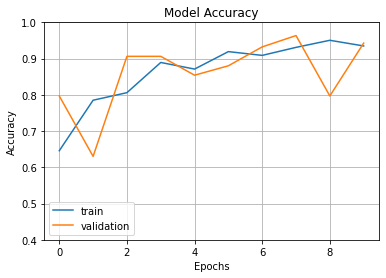

In [58]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

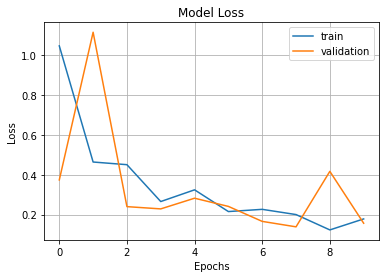

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()